<a href="https://colab.research.google.com/github/avinashramteke5/skills-introduction-to-github/blob/main/Sleep_and_health_statastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


In [4]:
df =pd.read_csv('/content/Health_Sleep_Statistics.csv')
df

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


In [5]:
df.shape


(100, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [7]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [8]:
df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop(['User ID'],axis=1,inplace=True)

In [11]:
df

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...
95,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


Age vs Sleep Quality

In [16]:
age_sleep_quality_corr=df[['Age','Sleep Quality']].corr() # Changed 'Sleep quality' to 'Sleep Quality' assuming there was a typo in the column name.
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [18]:
age_sleep_quality_corr['Age']

,Age
Age,1.000000
Sleep Quality,-0.848356


Text(0, 0.5, 'Sleep Quality')

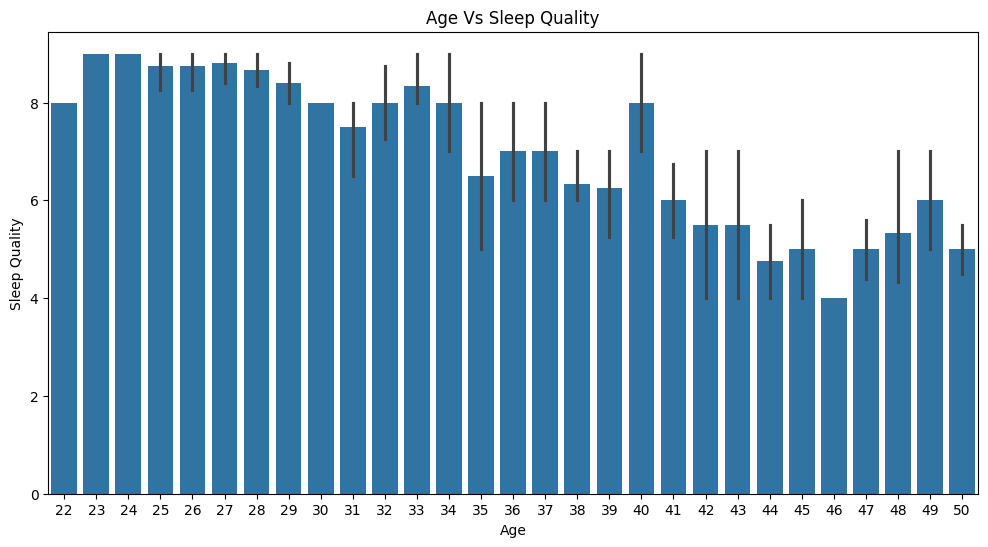

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y='Sleep Quality',data=df)
plt.title('Age Vs Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')

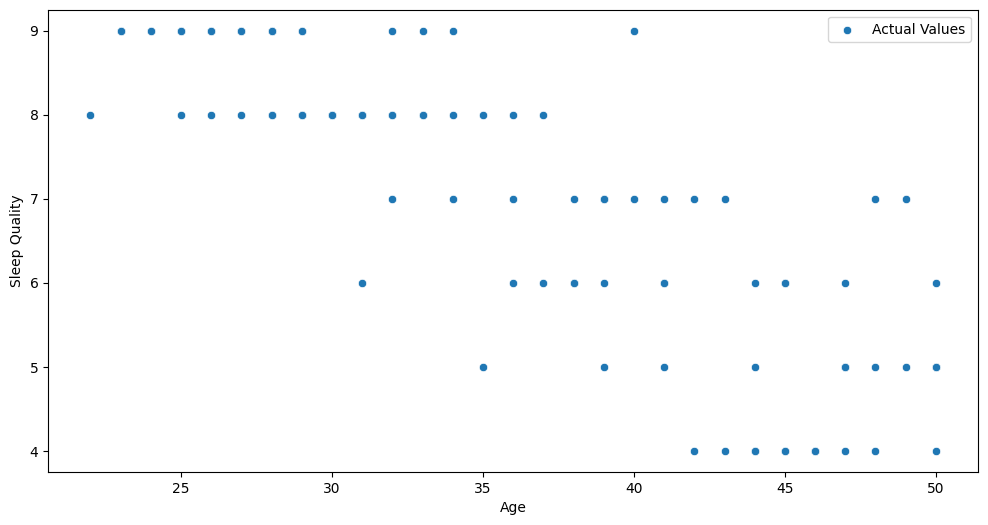

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Sleep Quality',label='Actual Values',data =df)
plt.show()

physical Activity vs sleep activity

In [24]:
df['Physical Activity Level'].head()

,Physical Activity Level
0,medium
1,low
2,high
3,low
4,high


In [25]:
df['Sleep Quality'].head()

,Sleep Quality
0,8
1,7
2,9
3,5
4,8


In [26]:
df['Gender'].head()

,Gender
0,f
1,m
2,f
3,m
4,f


<Axes: xlabel='Gender', ylabel='Sleep Quality'>

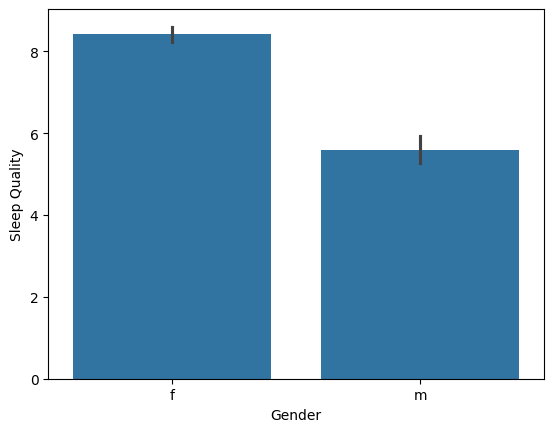

In [27]:
sns.barplot(x='Gender',y='Sleep Quality',data = df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

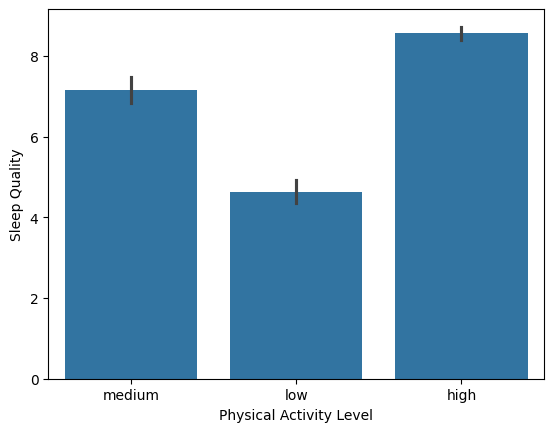

In [28]:
sns.barplot(x='Physical Activity Level',y='Sleep Quality',data =df)

In [30]:
changes={'low': 1, 'medium':2, 'high':3}

In [31]:
df['Physical Acitvity Level'] = df['Physical Activity Level'].map(changes)
df['Physical Acitvity Level'].head()

,Physical Acitvity Level
0,2
1,1
2,3
3,1
4,3


<Axes: xlabel='Gender', ylabel='Physical Acitvity Level'>

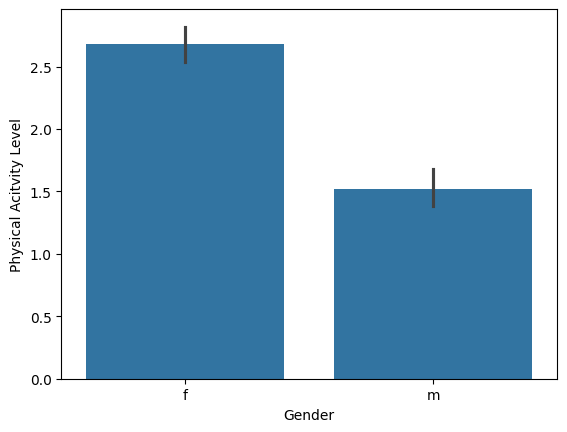

In [32]:
sns.barplot(x='Gender',y='Physical Acitvity Level',data=df)

Wake up & Sleep Time & Sleep Quality

In [33]:
df['Bedtime'].head()


,Bedtime
0,23:00
1,00:30
2,22:45
3,01:00
4,23:30


In [34]:
df['Wake-up Time'].head()

,Wake-up Time
0,06:30
1,07:00
2,06:45
3,06:30
4,07:00


In [35]:
def sleep_time_helper_funciton(str_time):
    hour = str_time.split(':')[0]
    mins = str_time.split(':')[1]
    return int(hour) + int(mins)/60
df['Bedtime']=df['Bedtime'].apply(sleep_time_helper_funciton)
df['Wake-up Time']=df['Wake-up Time'].apply(sleep_time_helper_funciton)

In [36]:
df['Bedtime'].head()

,Bedtime
0,23.00
1,0.50
2,22.75
3,1.00
4,23.50


In [37]:
df['Wake-up Time'].head()

,Wake-up Time
0,6.50
1,7.00
2,6.75
3,6.50
4,7.00


In [38]:
df['Total Sleep Duration']=(df['Wake-up Time']-df['Bedtime'])%24
df['Total Sleep Duration'].head()

,Total Sleep Duration
0,7.5
1,6.5
2,8.0
3,5.5
4,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

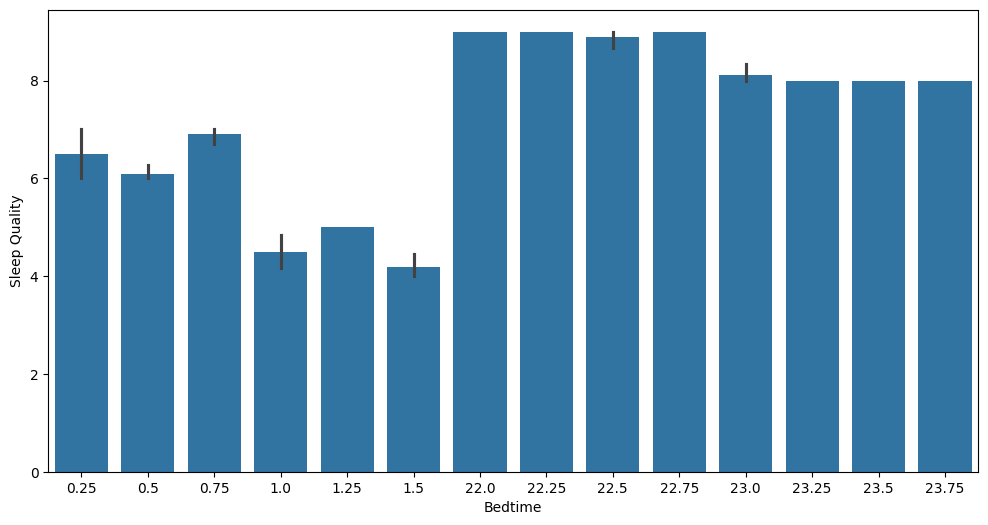

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x='Bedtime',y='Sleep Quality',data =df)

<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

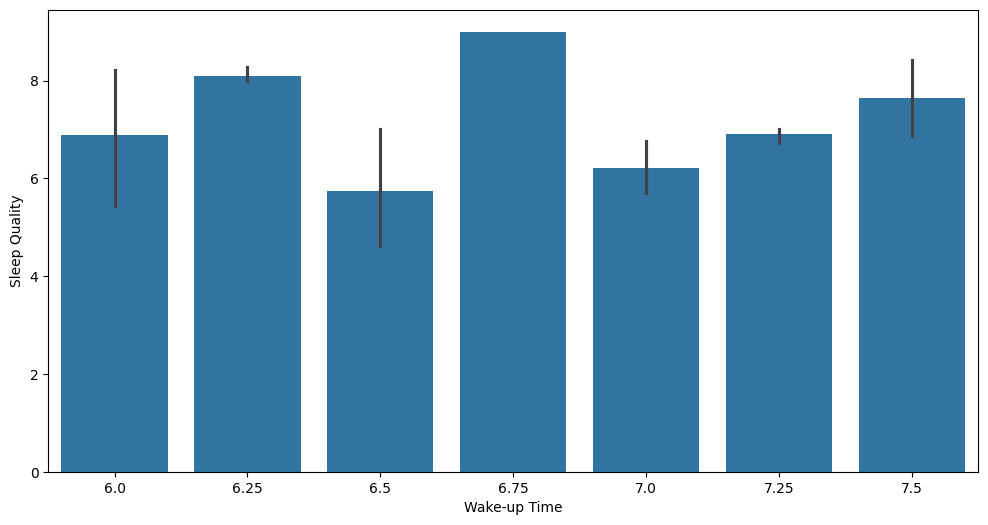

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='Wake-up Time',y='Sleep Quality',data =df)

<Axes: xlabel='Total Sleep Duration', ylabel='Sleep Quality'>

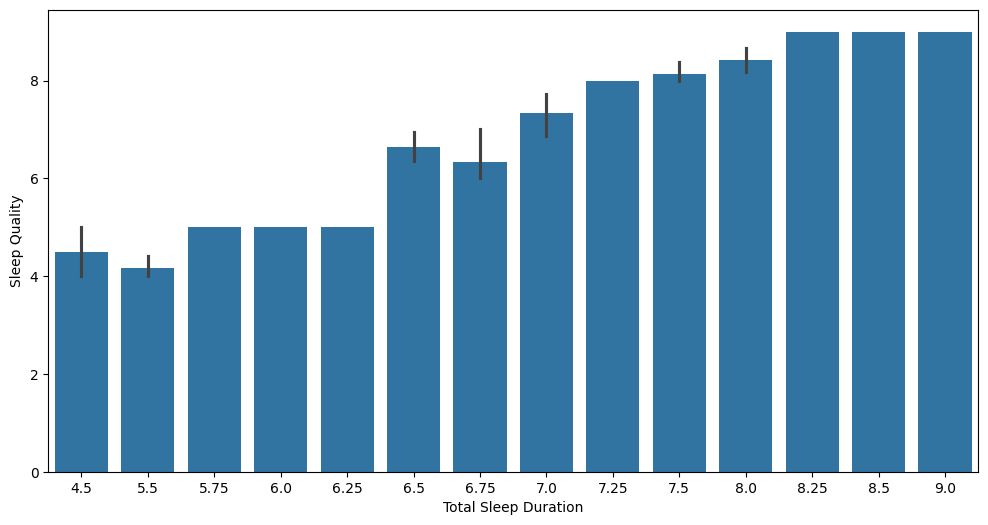

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x='Total Sleep Duration',y='Sleep Quality',data =df)

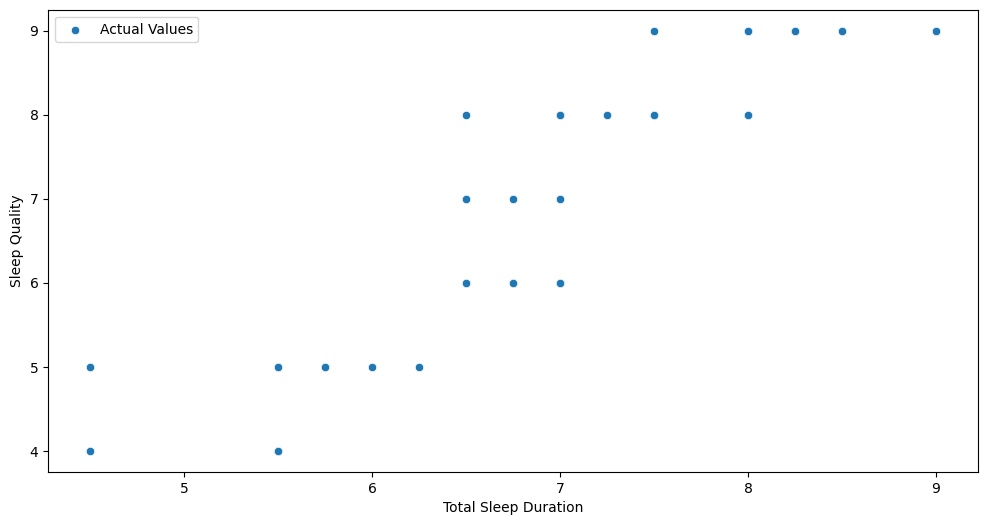

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Total Sleep Duration',y='Sleep Quality',data=df, label='Actual Values')
plt.show()


Sleep Disorder vs Sleep Quality

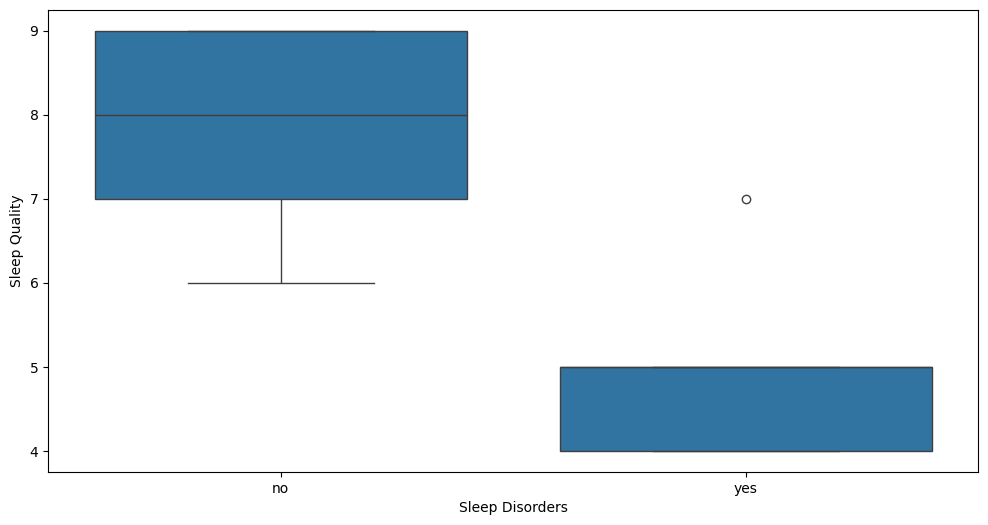

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Sleep Disorders',y='Sleep Quality',data=df)
plt.show()

In [44]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num.head()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Acitvity Level,Total Sleep Duration
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5


Calories Burned Vs Sleep Quality

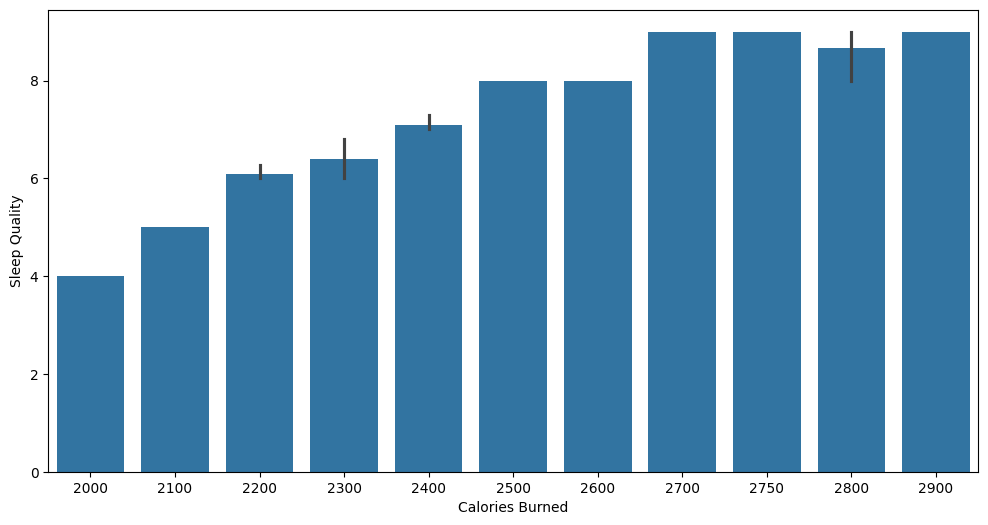

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x='Calories Burned',y='Sleep Quality',data=df)
plt.show()

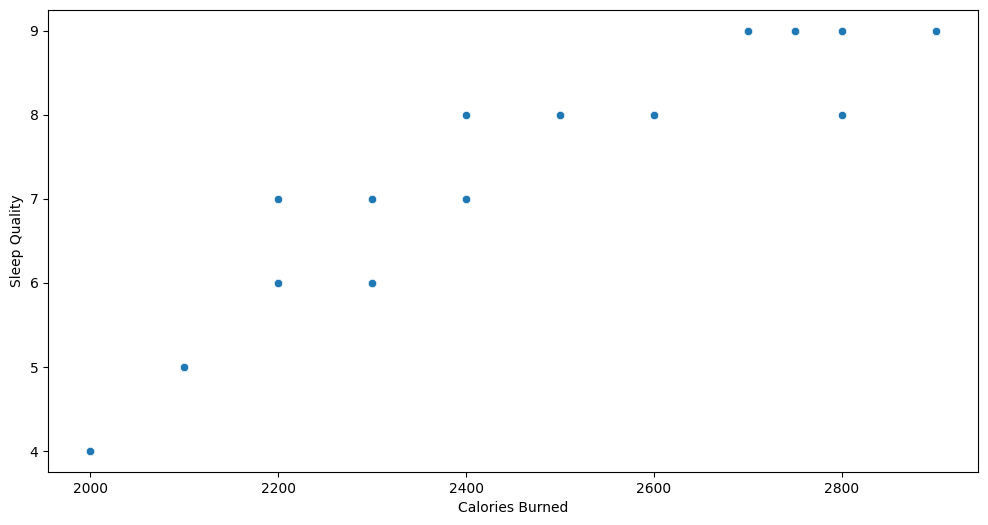

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Calories Burned',y='Sleep Quality',data =df)
plt.show()

Dietary Habits Vs Sleep Quality

In [48]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
unhealthy,41
medium,30
healthy,29


In [49]:
changes={'unhealthy':1,'medium':2,'healthy':3}
df['Dietary Habits']=df['Dietary Habits'].map(changes)

In [50]:
df['Dietary Habits']

,Dietary Habits
0,3
1,1
2,3
3,1
4,2
...,...
95,2
96,2
97,1
98,3


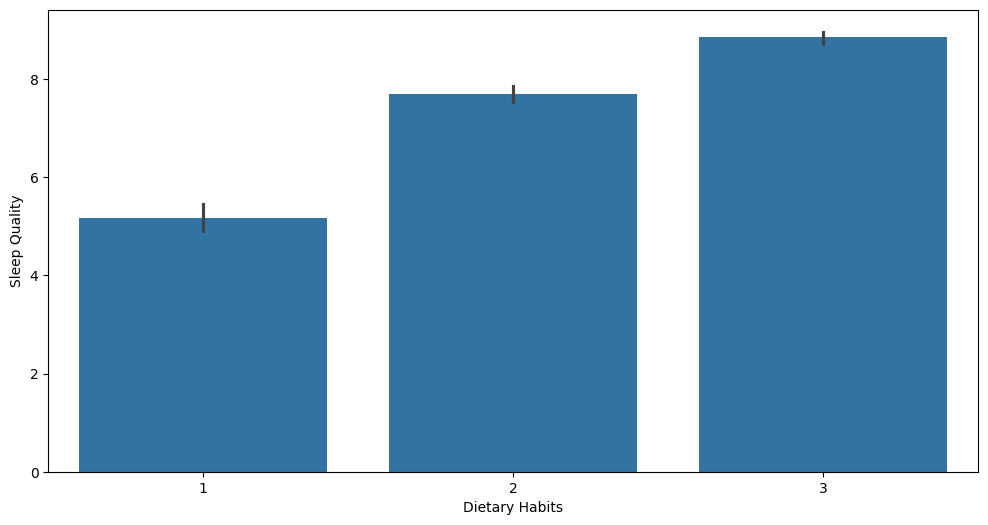

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(x='Dietary Habits',y='Sleep Quality',data=df)
plt.show()

Medication Usage Vs Sleep Quality

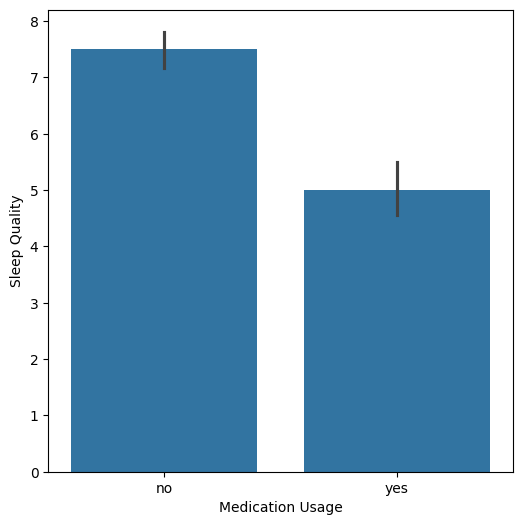

In [53]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'Medication Usage', y = 'Sleep Quality', data = df)
plt.show()

Correlation

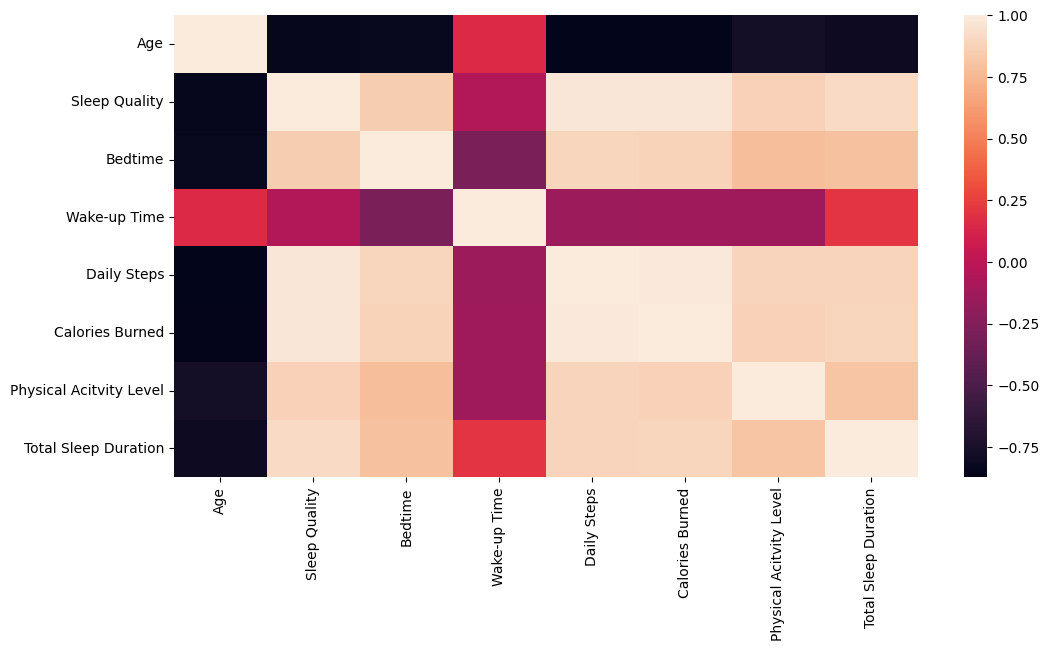

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(df_num.corr())
plt.show()